In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [50]:
df.corr()

,0,1,2,3
0,1.000000,-0.012398,-0.327227,0.060867
1,-0.012398,1.000000,0.009903,0.056410
2,-0.327227,0.009903,1.000000,-0.058109
3,0.060867,0.056410,-0.058109,1.000000


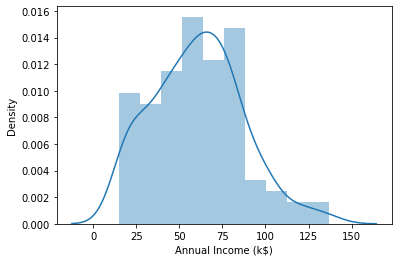

In [6]:
sns.distplot(df['Annual Income (k$)'] );

In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

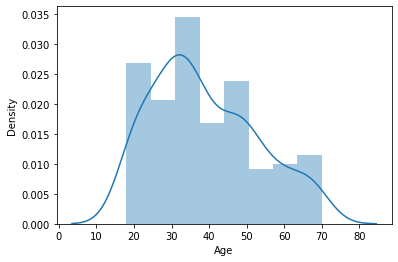

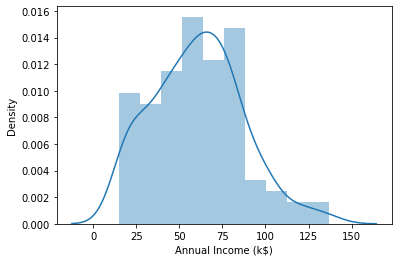

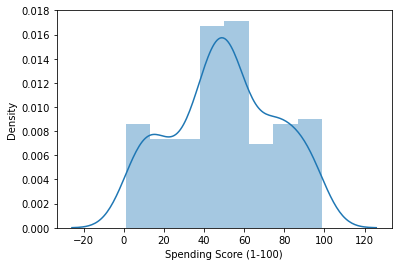

In [8]:
col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in col:
    plt.figure()
    sns.distplot(df[i])

In [9]:
df = df.rename(columns={'Genre':'Gender'})

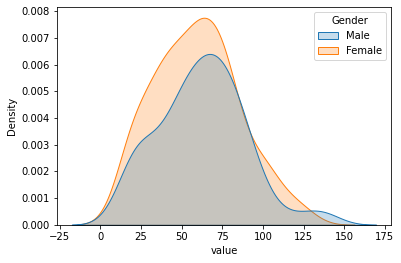

In [10]:
df1 = pd.melt(df , id_vars=['Gender'] , value_vars=['Annual Income (k$)'] , var_name = 'Metric')
sns.kdeplot(data=df1 , x = 'value' , shade = True , hue='Gender' );

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


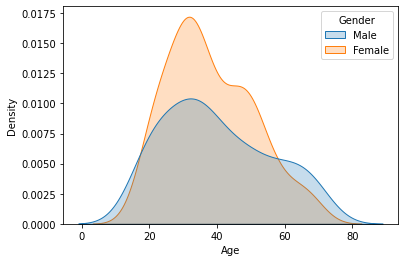

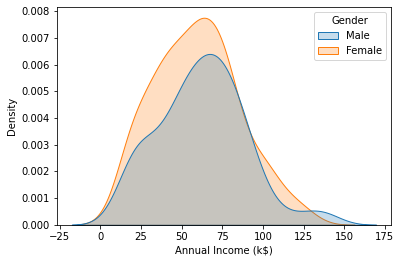

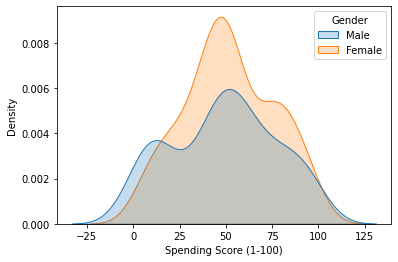

In [12]:
col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in col:
    plt.figure()
    sns.kdeplot(data=df , x=i , shade=True , hue='Gender')

In [13]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

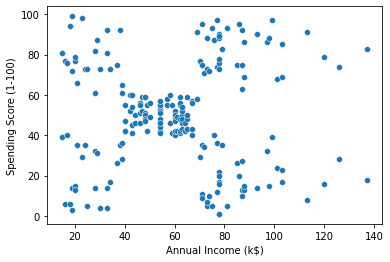

In [14]:
sns.scatterplot(data=df , x='Annual Income (k$)' ,  y= 'Spending Score (1-100)')

In [15]:
df= df.drop('CustomerID' , axis=1)

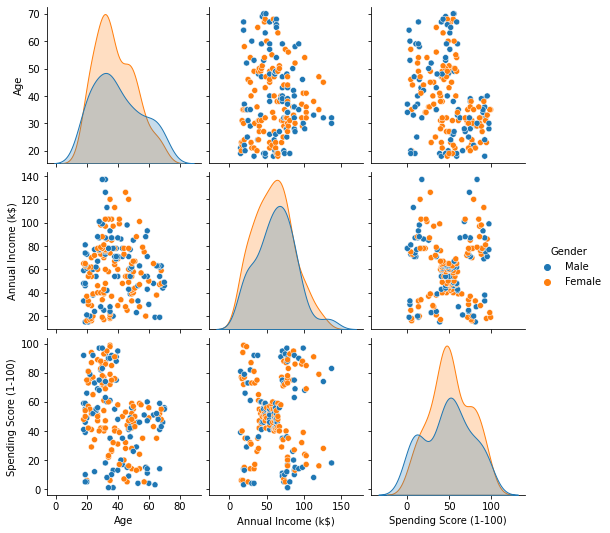

In [16]:
sns.pairplot(df , hue='Gender');

In [17]:
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


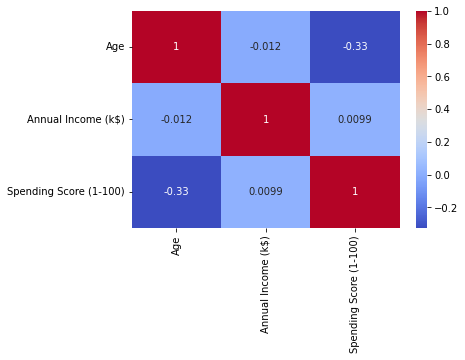

In [19]:
sns.heatmap(df.corr() , cmap='coolwarm' ,annot=True);

# Clustering - Univariate, Bivariate, Multivariate

In [20]:
clustering1 = KMeans(n_clusters=3)

In [21]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [22]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [24]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [25]:
clustering1.inertia_

23517.330930930926

In [26]:
inertia_scores =[]
for i in range(1 , 11):
    kmean = KMeans(n_clusters = i)
    kmean.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmean.inertia_)

In [27]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3949.2756132756135,
 2822.4996947496943,
 2168.4787157287155,
 1743.4772727272725]

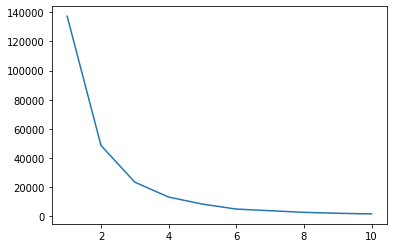

In [28]:
plt.plot(range(1,11) , inertia_scores);

In [29]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [30]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [31]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,3
2,Female,20,16,6,0,2
3,Female,23,16,77,0,3
4,Female,31,17,40,0,2


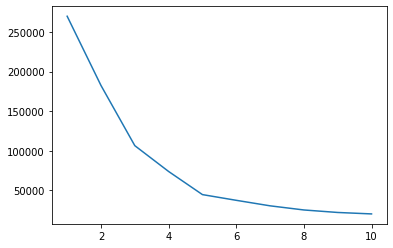

In [32]:
inertia_scores2 =[]
for i in range(1 , 11):
    kmean2 = KMeans(n_clusters = i)
    kmean2.fit(df[['Annual Income (k$)' , 'Spending Score (1-100)']])
    inertia_scores2.append(kmean2.inertia_)
plt.plot(range(1,11) , inertia_scores2);

In [33]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y' , 0]

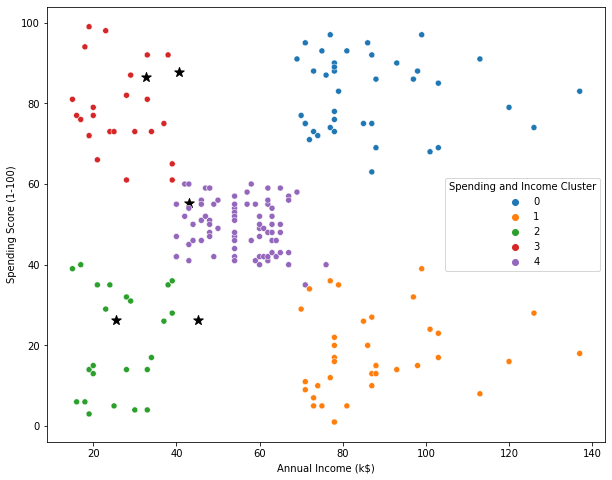

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [35]:
pd.crosstab(df['Spending and Income Cluster'] , df['Gender'] , normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.472222,0.527778
2,0.608696,0.391304
3,0.608696,0.391304
4,0.582278,0.417722


In [36]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,40.666667,87.750000,17.583333
2,45.217391,26.304348,20.913043
3,25.521739,26.304348,78.565217
4,43.088608,55.291139,49.569620


In [37]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [38]:
scale = StandardScaler()

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,3
2,Female,20,16,6,0,2
3,Female,23,16,77,0,3
4,Female,31,17,40,0,2


In [40]:
dff = pd.get_dummies(df , drop_first =True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,3,1
2,20,16,6,0,2,0
3,23,16,77,0,3,0
4,31,17,40,0,2,0


In [41]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [42]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [43]:
dff = scale.fit_transform(dff)

In [44]:
df = pd.DataFrame(scale.fit_transform(dff))

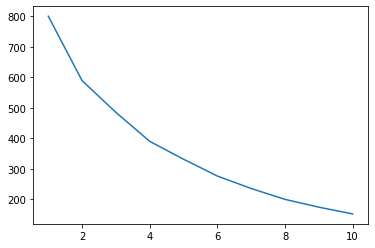

In [45]:
inertia_scores3 =[]
for i in range(1 , 11):
    kmean3 = KMeans(n_clusters = i)
    kmean3.fit(df)
    inertia_scores3.append(kmean3.inertia_)
plt.plot(range(1,11) ,inertia_scores3 )

In [46]:
df

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [ ]:
df